In [39]:
import pandas as pd 
import numpy as np
import scipy
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('train.csv')


df['Age'].fillna(df['Age'].mean(), inplace=True)
Age = df.Age
Fare = df.Fare



from scipy.stats import shapiro

stat, p = shapiro(Age)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.959, p=0.000
Probably not Gaussian


In [40]:
from scipy.stats import normaltest


stat, p = normaltest(Age)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=43.859, p=0.000
Probably not Gaussian


In [41]:
from scipy.stats import anderson

result = anderson(Age)

print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=15.318
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [42]:
from scipy.stats import pearsonr

stat, p = pearsonr(Age, Fare)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.092, p=0.006
Probably dependent


C:\Users\playn\AppData\Local\Temp\ipykernel_16948\4060800388.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Age,


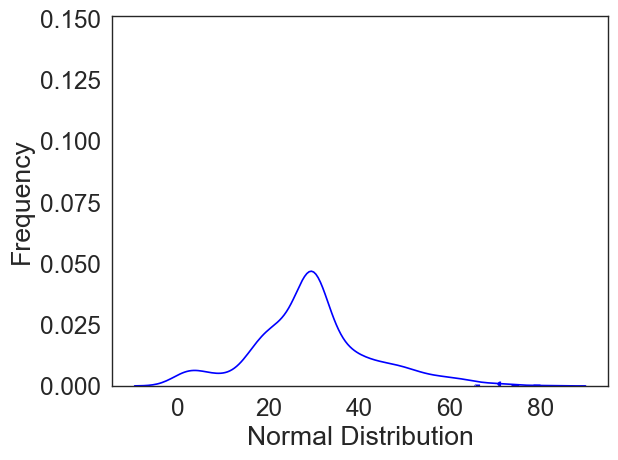

In [69]:
import scipy.stats as stats

data =stats.norm(scale=1, loc=0).rvs(1000)

ax = sns.distplot(Age,
                  bins=50,
                  kde=True,
                  color='Blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()